In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_excel('books.xlsx')
df.shape

(6905, 10)

In [3]:
df.head(2)

,bookID,title,authors,average_rating,isbn,language_code,rcmd,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPrÃ©,4.56,439785960,eng,No,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPrÃ©,4.49,439358078,eng,Yes,870,1996446,27613


In [4]:
dummies=pd.get_dummies(df.language_code)

In [5]:
dummies.shape

(6905, 24)

In [6]:
dummies.columns

Index(['ara', 'cat', 'dan', 'en-CA', 'en-GB', 'en-US', 'eng', 'fre', 'ger',
       'glg', 'grc', 'heb', 'ita', 'jpn', 'msa', 'mul', 'nl', 'por', 'rus',
       'spa', 'srp', 'swe', 'tur', 'zho'],
      dtype='object')

In [7]:
df['lang']=df.language_code.map({'ara':1,'cat':2,'dan':3,'en-CA':4,'en-GB':5,'en-US':6,'eng':7,'fre':8,'ger':9,'glg':10,'grc':11,'heb':12,'ita':13,'jpn':14,'msa':15,'mul':16,'nl':17,'por':18,'rus':19,'spa':20,'srp':21,'swe':22,'tur':23,'zho':24})

In [8]:
df['rcm']=df.rcmd.map({'Yes':1,'No':0})

In [9]:
df.head(3)

,bookID,title,authors,average_rating,isbn,language_code,rcmd,num_pages,ratings_count,text_reviews_count,lang,rcm
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPrÃ©,4.56,439785960,eng,No,652,1944099,26249,7,0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPrÃ©,4.49,439358078,eng,Yes,870,1996446,27613,7,1
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPrÃ©,4.47,439554934,eng,No,320,5629932,70390,7,0


In [10]:
df.drop("bookID",inplace=True,axis=1)
df.drop("title",inplace=True,axis=1)
df.drop("isbn",inplace=True,axis=1)
df.drop("authors",inplace=True,axis=1)
df.drop("language_code",inplace=True,axis=1)
df.drop("rcmd",inplace=True,axis=1)
df.head(2)

,average_rating,num_pages,ratings_count,text_reviews_count,lang,rcm
0,4.56,652,1944099,26249,7,0
1,4.49,870,1996446,27613,7,1


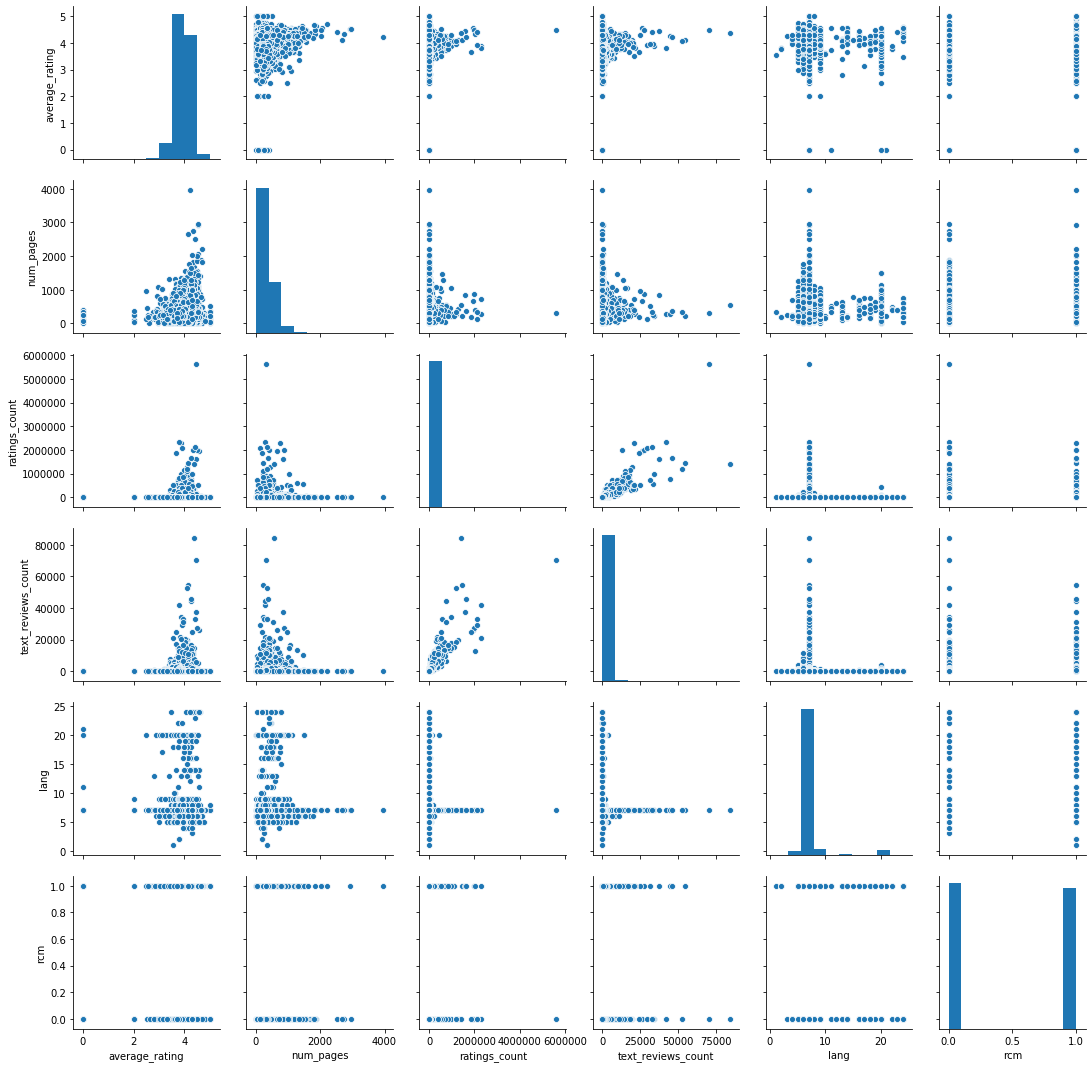

In [11]:
sb.pairplot(df)

In [12]:
df.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'lang', 'rcm'],
      dtype='object')

In [13]:
X = df.drop("rcm", axis = 1)
y = df['rcm'] 

X.head(2)

,average_rating,num_pages,ratings_count,text_reviews_count,lang
0,4.56,652,1944099,26249,7
1,4.49,870,1996446,27613,7


In [14]:
y.head(2)

0    0
1    1
Name: rcm, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size = 0.50, random_state = 111)


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [59]:
lm = LogisticRegression()

In [60]:
lm.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
predictions = lm.predict(X_test)

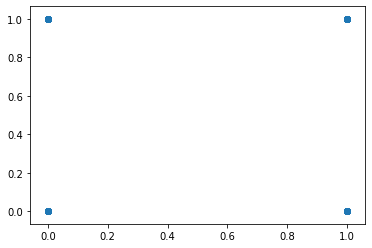

In [62]:
plt.scatter(y_test, predictions)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.99      0.67      1762
           1       0.59      0.02      0.03      1691

    accuracy                           0.51      3453
   macro avg       0.55      0.50      0.35      3453
weighted avg       0.55      0.51      0.36      3453

[[1743   19]
 [1664   27]]


In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

# predict probabilities
probs = lm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
auc

0.48020882032102236

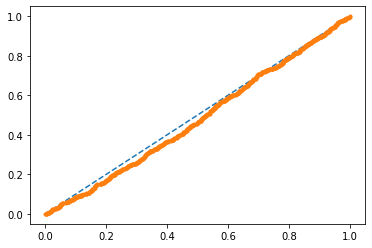

In [39]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')   #plt.plot(x, y)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()